In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib
import sys
import os

project_path = os.path.abspath('..')
if project_path not in sys.path:
    sys.path.append(project_path)



from MieSppForce import frenel, dipoles, green_func, force

c_const = 299792458
eps0_const = 1/(4*np.pi*c_const**2)*1e7
mu0_const = 4*np.pi * 1e-7

In [2]:
eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

R = 110
dist = 2
a_angle = np.pi/4
phase=0
STOP=45
angle=25*np.pi/180
point = [0,0,dist+R]

z0 = point[2]

wls=np.linspace(400,1100,60)

In [3]:
F_z_air = np.empty(len(wls))

for i in tqdm(range(len(wls))):
    f =  force.F(wls[i], 1, point, R, eps_Si, 0,amplitude=1,phase=0,a_angle=0, stop=STOP, full_output=False)
    F_z_air[i] = f[2]

F0 = np.max(np.abs(F_z_air))

100%|██████████| 60/60 [00:01<00:00, 38.58it/s]


In [4]:

F_x = np.empty((len(wls), 8))
F_y = np.empty_like(F_x)
F_z = np.empty_like(F_x)

for i in tqdm(range(len(wls))):
    f =  force.F(wls[i], eps_Au, point, R, eps_Si, angle,amplitude=1,phase=phase,a_angle=a_angle, stop=STOP, full_output=True)
    F_x[i,:] = f[0]
    F_y[i,:] = f[1]
    F_z[i,:] = f[2]

 30%|███       | 18/60 [00:35<01:29,  2.14s/it]c:\Users\borod\Desktop\SPP_ANALYTICAL\SPP_ANALYTICAL\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:444: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  im_retval = quad(imfunc, a, b, args, full_output, epsabs,
 38%|███▊      | 23/60 [00:47<01:28,  2.38s/it]c:\Users\borod\Desktop\SPP_ANALYTICAL\SPP_ANALYTICAL\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:441: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 60/60 [02:14<00:00,  2.23s/it]


In [5]:
P,M = np.empty((len(wls),3), dtype=complex),np.empty((len(wls),3), dtype=complex)
for i in tqdm(range(len(wls))):
    p,m = dipoles.calc_dipoles_v2(wls[i], eps_Au, point, R, eps_Si, angle, amplitude=1, phase=phase, a_angle=a_angle, stop=STOP)
    p,m = p[:,0],m[:,0]
    P[i,:],M[i,:]=p,m

100%|██████████| 60/60 [00:00<00:00, 2995.97it/s]


<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\l'
C:\Users\borod\AppData\Local\Temp\ipykernel_17148\710230224.py:4: SyntaxWarning: invalid escape sequence '\d'
  plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
C:\Users\borod\AppData\Local\Temp\ipykernel_17148\710230224.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$, nm')


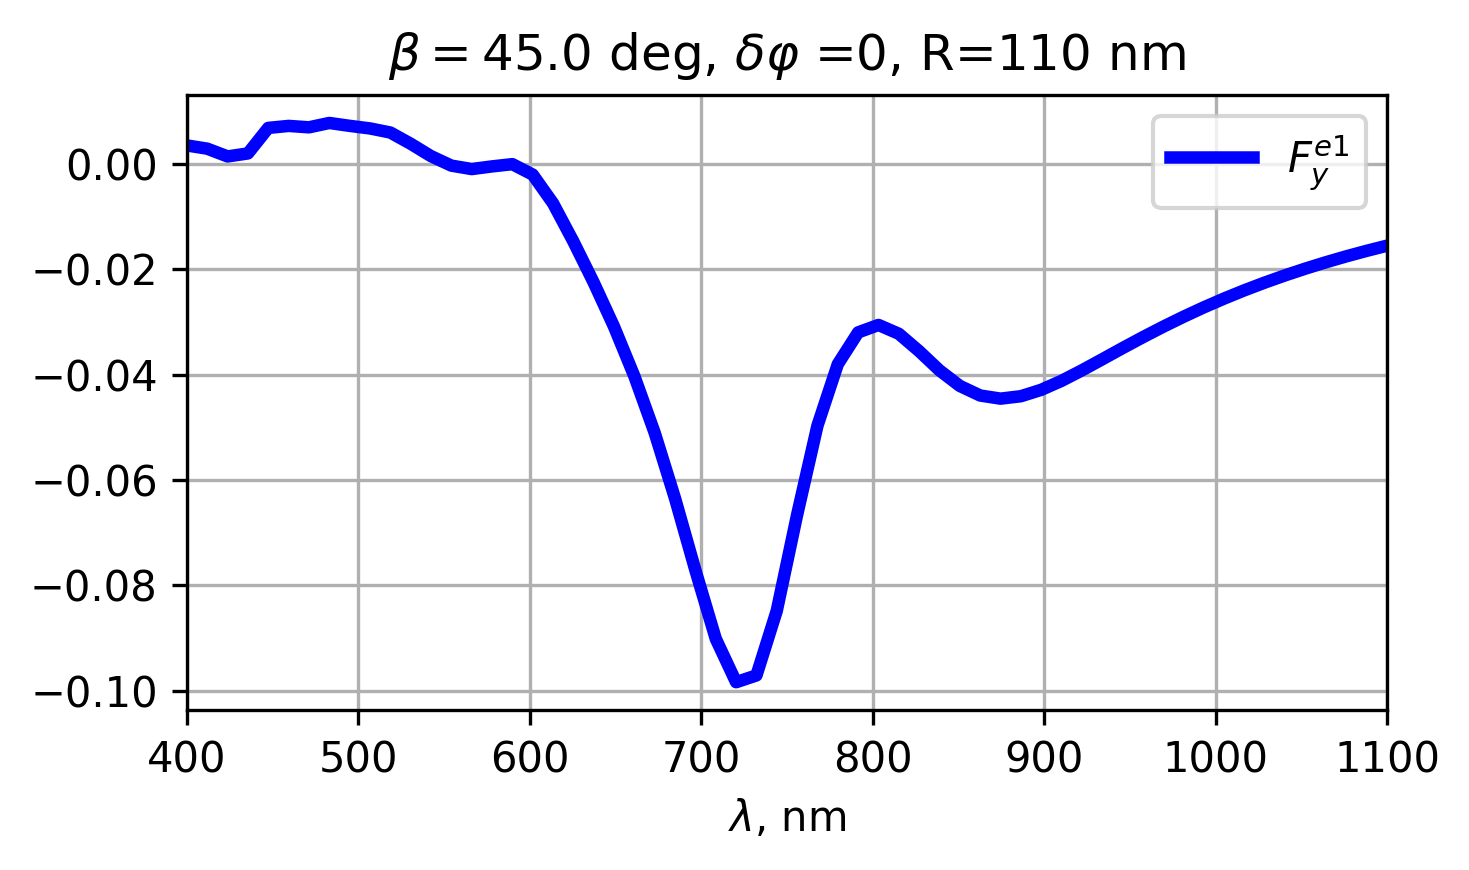

In [362]:
plt.figure(figsize=(5, 3), dpi=300)
plt.plot(wls, F_y[:,2]/F0, label='$F_y^{e1}$', lw=3, c='blue')
plt.xlim(wls[0], wls[-1])
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

plt_set(wls)
plt.xlabel('$\lambda$, nm')
plt.savefig(f'Fye1_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')

<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\borod\AppData\Local\Temp\ipykernel_17148\2313224408.py:4: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$, nm')
C:\Users\borod\AppData\Local\Temp\ipykernel_17148\2313224408.py:5: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('$C^2 \cdot m^2$')
C:\Users\borod\AppData\Local\Temp\ipykernel_17148\2313224408.py:6: SyntaxWarning: invalid escape sequence '\d'
  plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')


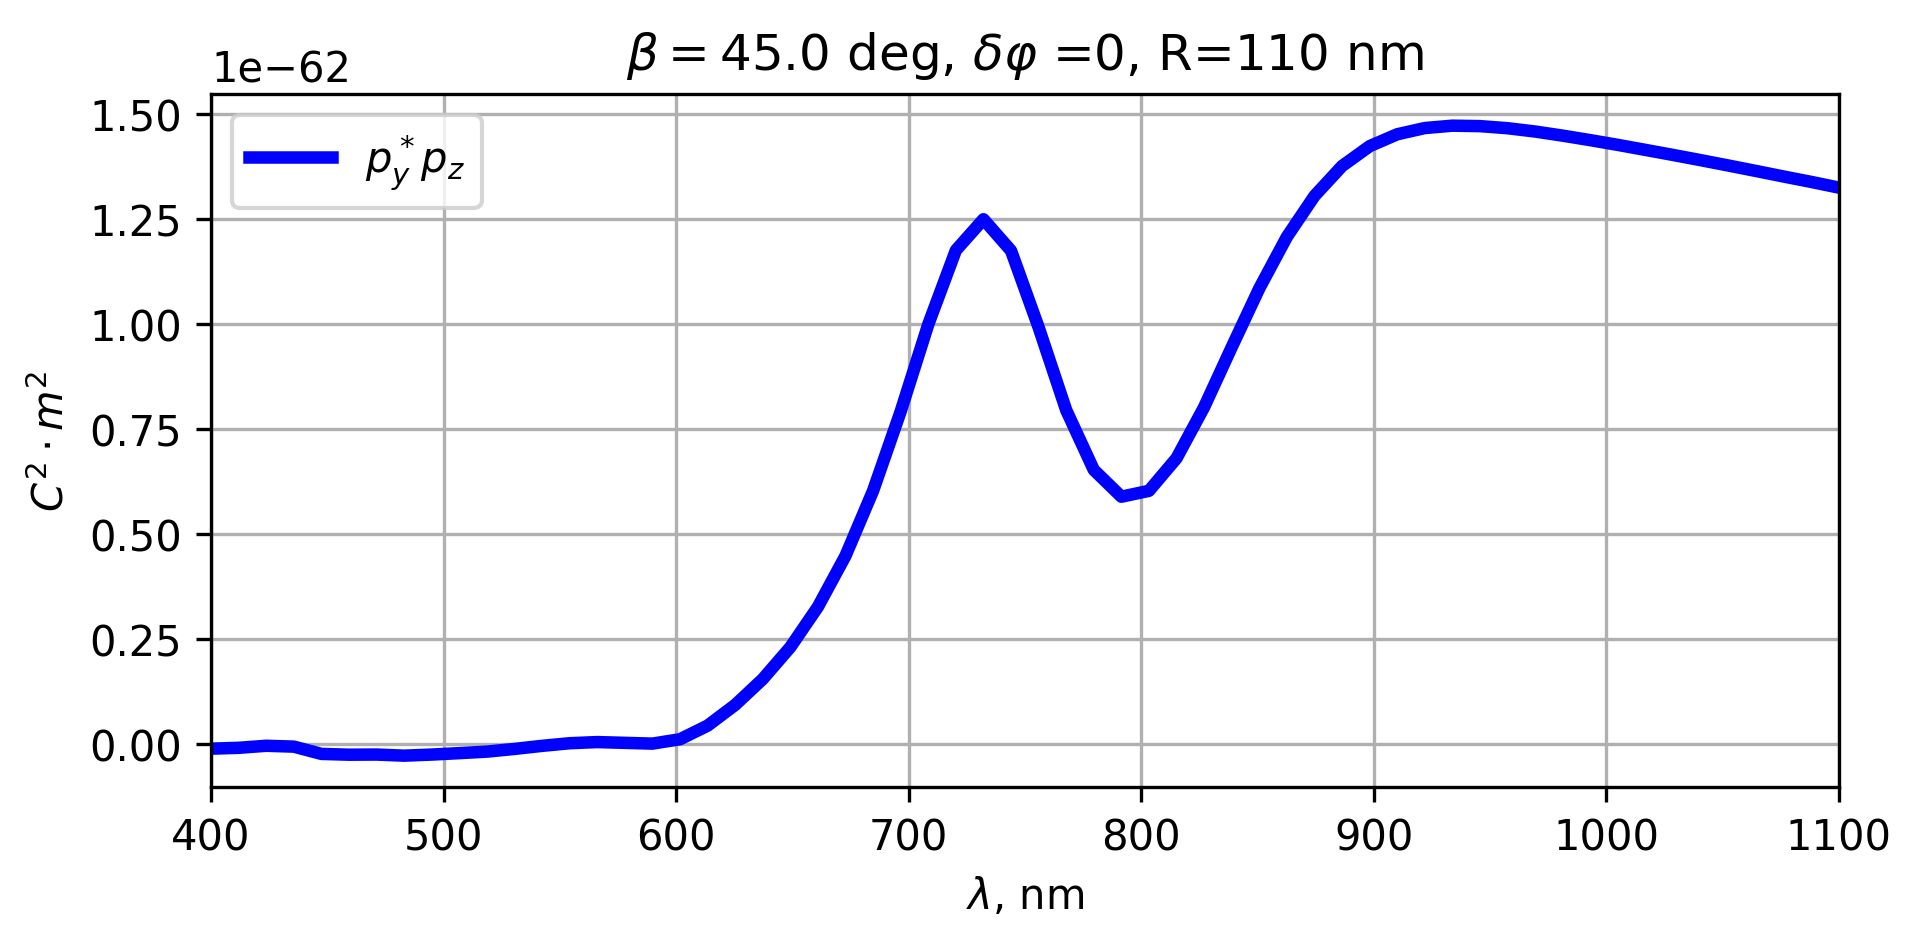

In [365]:
plt.figure(figsize=(7, 3), dpi=300)
plt.plot(wls, np.imag(P[:,1].conj()*P[:,2]), label='$p_y^* p_z$', lw=3, c='blue')
plt.grid()
plt.xlabel('$\lambda$, nm')
plt.ylabel('$C^2 \cdot m^2$')
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
plt.legend(loc="upper left")
plt.xlim(wls[0], wls[-1])
plt.savefig(f'pypz_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')
plt.show()


In [8]:
def AlphaE(R, eps_Si):
    return lambda wl: dipoles.alpha_v2(wl, R, eps_Si)[0]
def AlphaH(R, eps_Si):
    return lambda wl: dipoles.alpha_v2(wl, R, eps_Si)[1]

AlphaEE = AlphaE(R, eps_Si)
AlphaHH = AlphaH(R, eps_Si)


<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
C:\Users\borod\AppData\Local\Temp\ipykernel_17148\706224781.py:3: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$, nm')
C:\Users\borod\AppData\Local\Temp\ipykernel_17148\706224781.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$, nm')


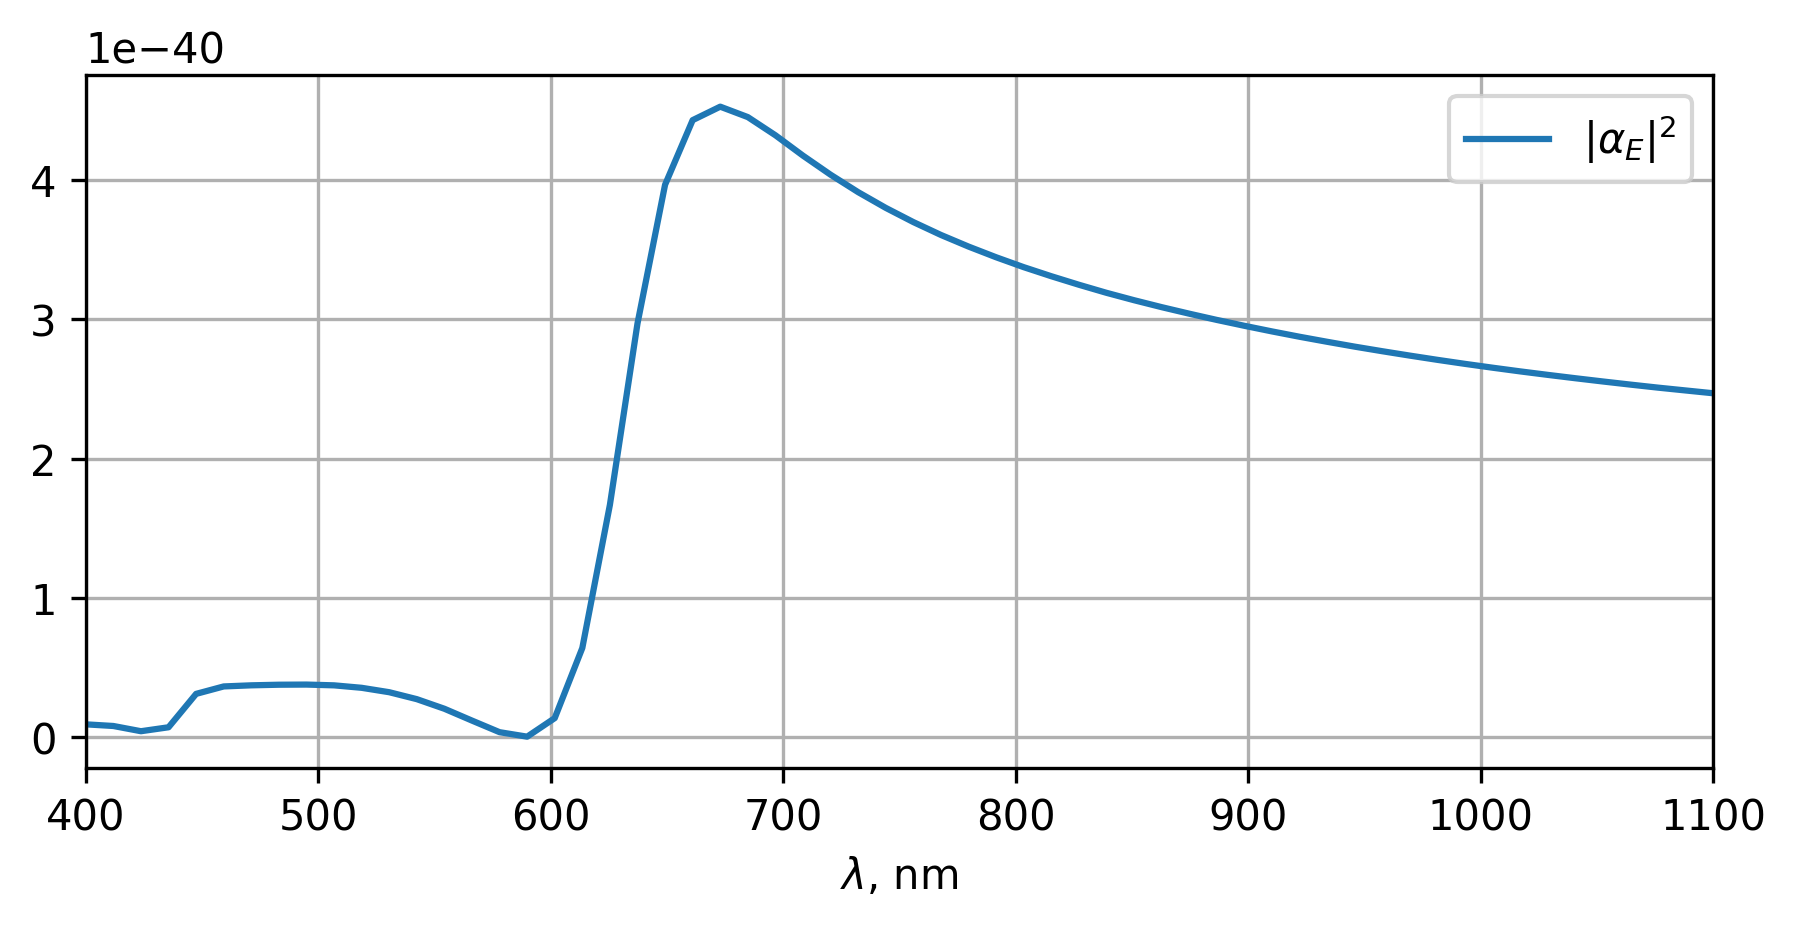

In [9]:
plt.figure(figsize=(7, 3), dpi=300)
plt.plot(wls, np.abs(AlphaEE(wls))**2, label='$|\\alpha_E|^2$')
plt.xlabel('$\lambda$, nm')
plt.xlim(wls[0], wls[-1])
plt.grid()
plt.legend()
plt.xlabel('$\lambda$, nm')
plt.show()

In [10]:
k0 = lambda wl: 2*np.pi/wl/1e-9
omega = lambda wl: 2*np.pi*c_const/wl/1e-9

In [11]:
dyGE_yz = np.zeros(len(wls), dtype=complex)
dyGH_yz,dyrotGHxz,dyrotGHzx = np.empty_like(dyGE_yz),  np.empty_like(dyGE_yz), np.empty_like(dyGE_yz)
GE0xx, GE0zz, GH0xx, GH0zz = np.empty_like(dyGE_yz),  np.empty_like(dyGE_yz), np.empty_like(dyGE_yz), np.empty_like(dyGE_yz)
rotGExy, rotGEyx = np.empty_like(dyGE_yz), np.empty_like(dyGE_yz)

for i in tqdm(range(len(wls))):
    dyGE, dyGH = green_func.dy_green_E_H(wls[i], point[2], eps_Au, STOP)
    dyrotGE, dyrotGH = green_func.dy_rot_green_E_H(wls[i], point[2], eps_Au, STOP)
    dyGE_yz[i] = dyGE[1,2]
    dyGH_yz[i] = dyGH[1,2]
    dyrotGHxz = dyrotGH[0,2]
    dyrotGHzx = dyrotGH[2,0]
    GE, GH = green_func.green_ref_00(wls[i], point[2], eps_Au, STOP)
    rotGE, _  = green_func.rot_green_ref_00(wls[i], point[2], eps_Au, STOP)
    GE0xx[i] = GE[0,0]
    GE0zz[i] = GE[2,2]
    GH0xx[i] = GH[0,0]
    GH0zz[i] = GH[2,2]
    rotGExy[i] = rotGE[0,1]
    rotGEyx[i] = rotGE[1,0]

100%|██████████| 60/60 [00:00<?, ?it/s]


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\borod\AppData\Local\Temp\ipykernel_17148\983673831.py:5: SyntaxWarning: invalid escape sequence '\d'
  plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')


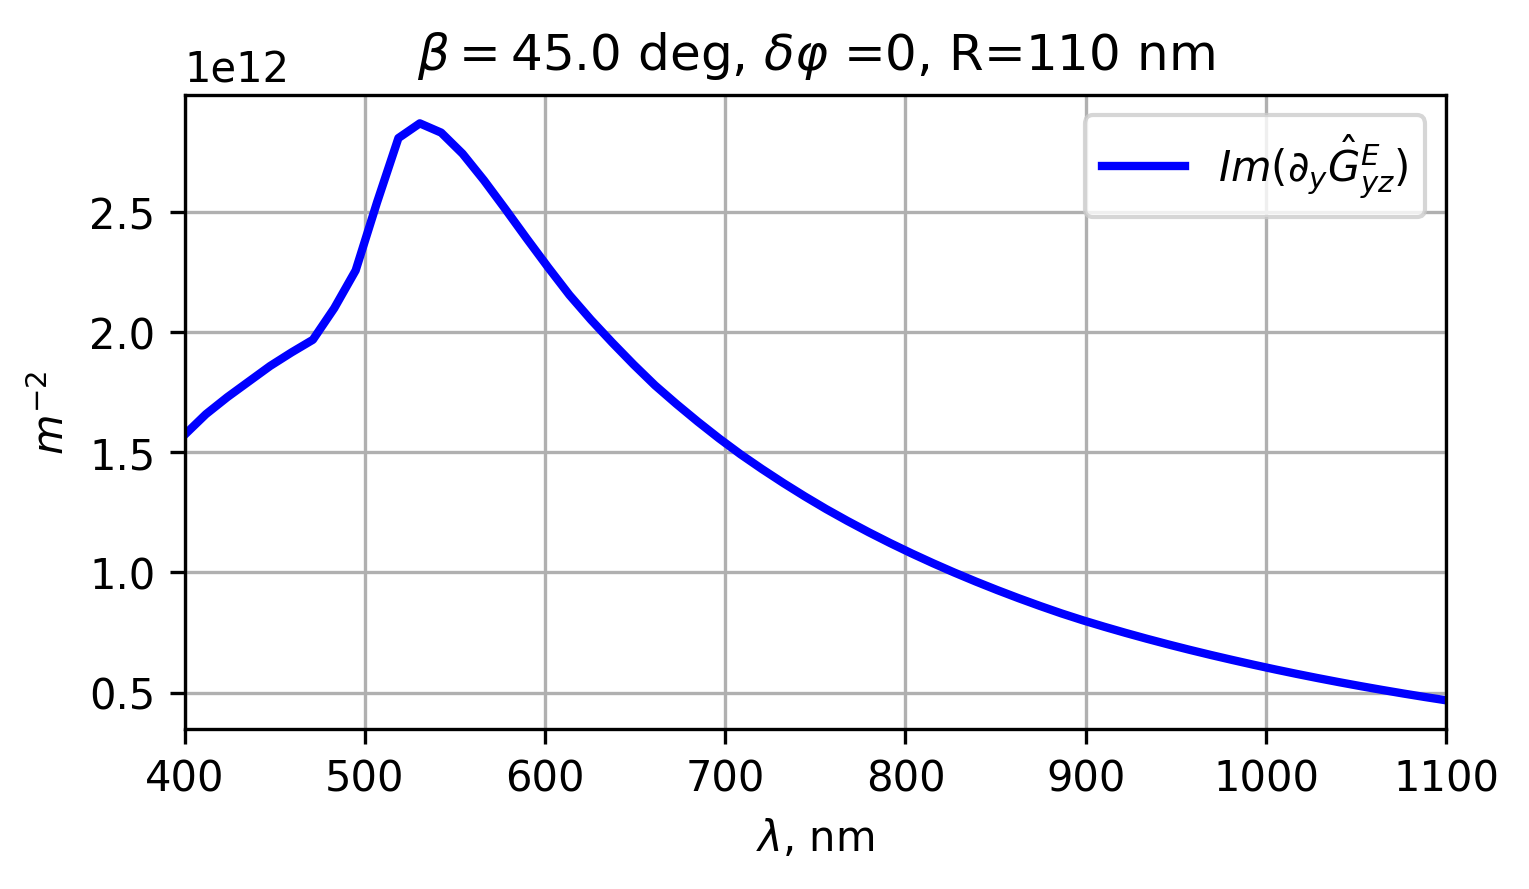

In [361]:
plt.figure(figsize=(5,3), dpi=300)
plt.plot(wls, np.imag(dyGE_yz), label=r'$Im(\partial_y \hat{G}^E_{yz})$', lw=2, c='b')
plt_set(wls)
plt.ylabel('$m^{-2}$')
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
plt.savefig(f'Im_dyGEyz_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')

In [12]:
GEExx = k0(wls)**2 * GE0xx/eps0_const
GEEzz = k0(wls)**2 * GE0zz/eps0_const
GMMxx = k0(wls)**2 * GH0xx
GMMzz = k0(wls)**2 * GH0zz

GMExy =  - 1j* omega(wls) * rotGExy 
GMEyx =  - 1j* omega(wls) * rotGEyx
GEMxy = GMExy * mu0_const
GEMyx = GMEyx * mu0_const

In [13]:
def RP(eps_Au, angle):
    return lambda wl: frenel.reflection_coeff_v2(wl, eps_Au, angle)[0]
def RS(eps_Au, angle):
    return lambda wl: frenel.reflection_coeff_v2(wl, eps_Au, angle)[1]
def KZ(angle):
    return lambda wl: 2*np.pi/wl *np.cos(angle)

RPP = RP(eps_Au, angle)
RSS = RS(eps_Au, angle)
KZZ = KZ(angle)

In [359]:
def plt_set(wls):
    plt.grid()
    plt.xlabel('$\lambda$, nm')
    plt.xlim(wls[0], wls[-1])
    plt.legend()
    plt.tight_layout()

<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
C:\Users\borod\AppData\Local\Temp\ipykernel_17148\3163024200.py:3: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$, nm')


# $Im(p_y^* p_z)$

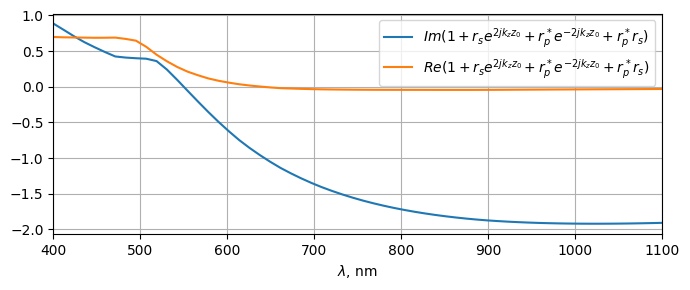

In [366]:
rp_conj_rs_py_pz_1 = 1+RPP(wls).conj() * np.exp(-2j*KZZ(wls)*z0) + RSS(wls)* np.exp(2j*KZZ(wls)*z0) + RPP(wls).conj()*RSS(wls) #OK

plt.figure(figsize=(7, 3))
plt.plot(wls, np.imag(rp_conj_rs_py_pz_1), label='$Im(1+r_s e^{2j k_z z_0} + r_p^* e^{-2j k_z z_0} + r_p^* r_s)$')
plt.plot(wls, np.real(rp_conj_rs_py_pz_1), label='$Re(1+r_s e^{2j k_z z_0} + r_p^* e^{-2j k_z z_0} + r_p^* r_s)$')
plt_set(wls)

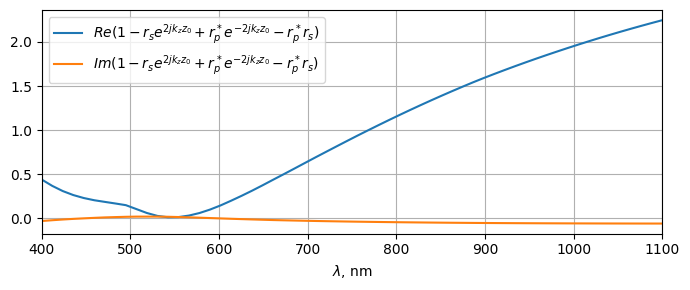

In [367]:
rp_conj_rs_py_pz_2= 1+RPP(wls).conj()*np.exp(-2j*KZZ(wls)*z0) - RSS(wls)*np.exp(2j*KZZ(wls)*z0) - RPP(wls).conj()*RSS(wls) #OK

plt.figure(figsize=(7, 3))
plt.plot(wls, np.real(rp_conj_rs_py_pz_2), label='$Re(1-r_s e^{2j k_z z_0} + r_p^* e^{-2j k_z z_0} - r_p^* r_s)$')
plt.plot(wls, np.imag(rp_conj_rs_py_pz_2), label='$Im(1-r_s e^{2j k_z z_0} + r_p^* e^{-2j k_z z_0} - r_p^* r_s)$')
plt_set(wls)

<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
C:\Users\borod\AppData\Local\Temp\ipykernel_17148\1832512521.py:17: SyntaxWarning: invalid escape sequence '\d'
  plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')


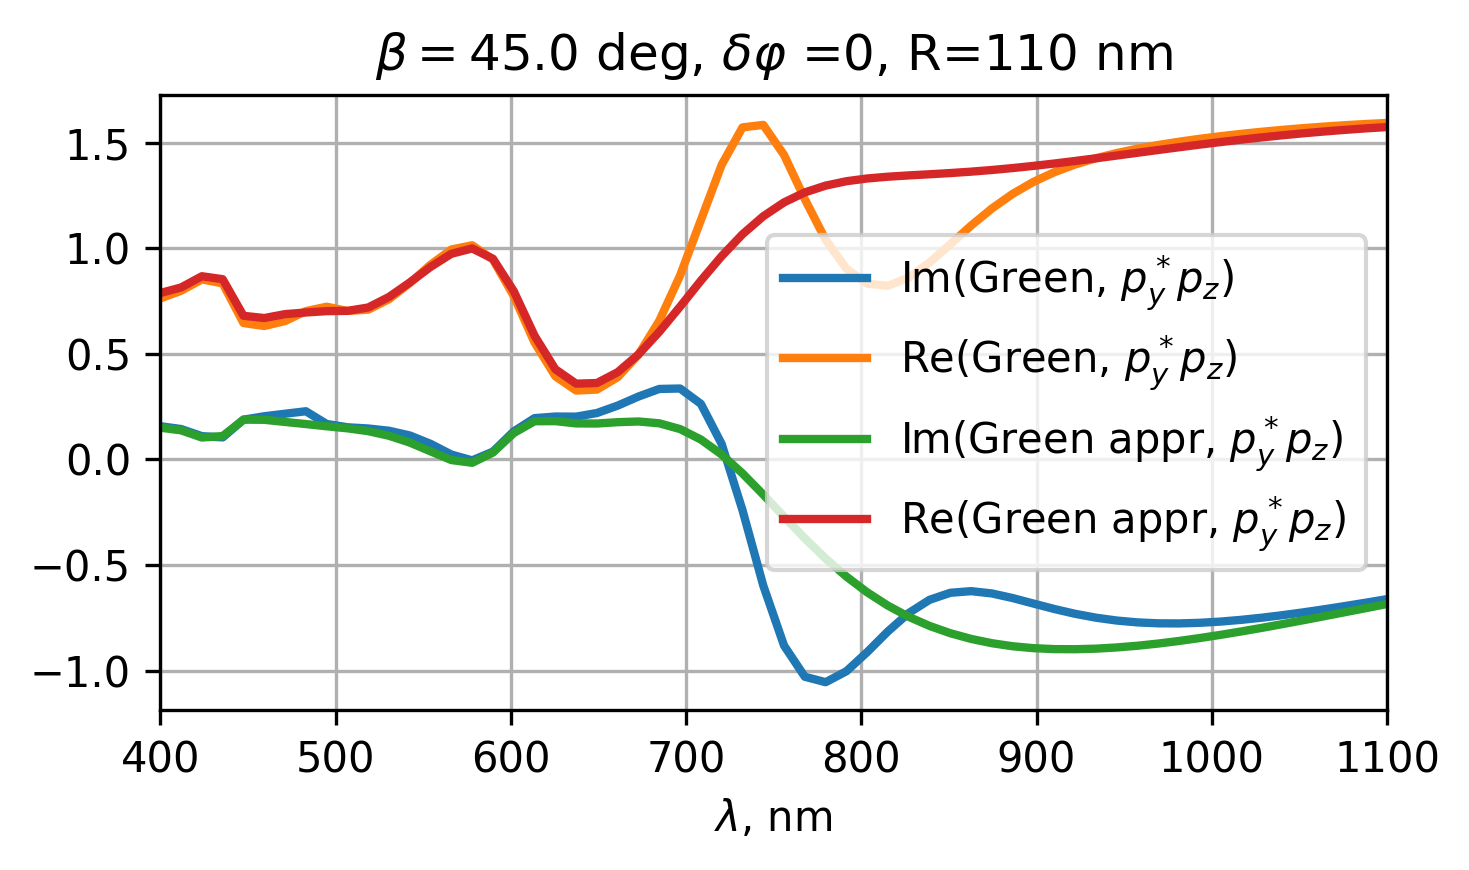

In [406]:
A = 1 - AlphaHH(wls)*GMMxx
B2 = 1 - AlphaEE(wls)*eps0_const*GEExx
B3 = AlphaEE(wls)*eps0_const*AlphaHH(wls)*GMExy*GEMyx

D = 1 - AlphaEE(wls).conj() * eps0_const * GEEzz.conj()


Greens_py_pz = A/(A * B2 - B3)/D

Greens_py_pz_v2= 1/ B2/D
plt.figure(figsize=(5,3), dpi=300)
plt.plot(wls, np.imag(Greens_py_pz), label='Im(Green, $p_y^* p_z$) ', lw=2)
plt.plot(wls, np.real(Greens_py_pz), label='Re(Green, $p_y^* p_z$) ', lw=2)

plt.plot(wls, np.imag(Greens_py_pz_v2), label='Im(Green appr, $p_y^* p_z$) ', lw=2)
plt.plot(wls, np.real(Greens_py_pz_v2), label='Re(Green appr, $p_y^* p_z$) ', lw=2)
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

plt_set(wls)

plt.savefig(f'green_pypz_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')


<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
C:\Users\borod\AppData\Local\Temp\ipykernel_17148\1603162664.py:16: SyntaxWarning: invalid escape sequence '\d'
  plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')


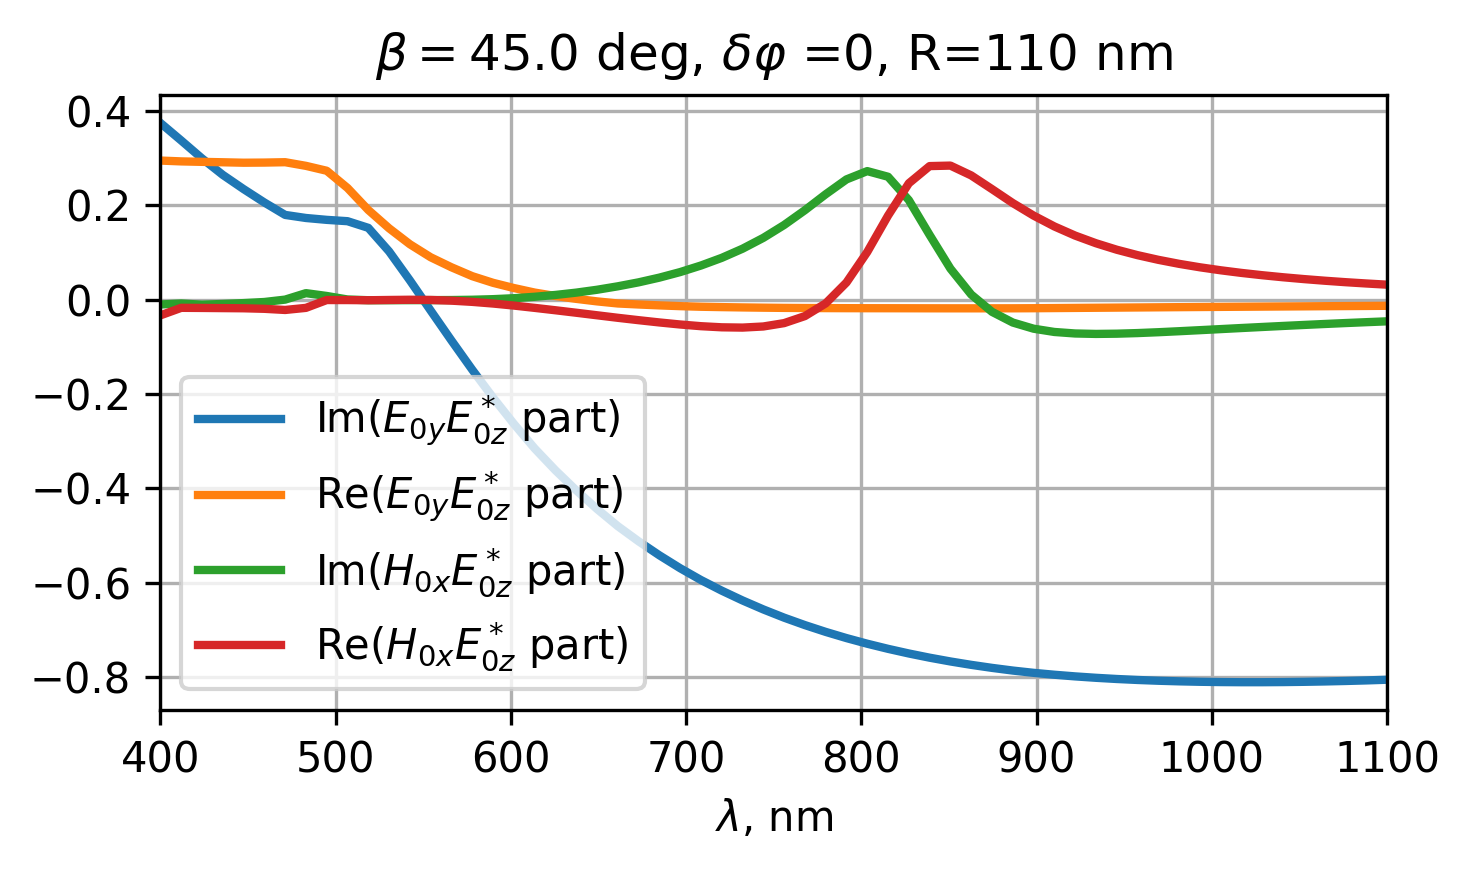

In [405]:


H0XE0z =  k0(wls) * np.sin(2*angle) * rp_conj_rs_py_pz_2 / (2 * omega(wls)*mu0_const )

E0yE0z = np.sin(angle) * rp_conj_rs_py_pz_1


py_pz_rprs_2 = AlphaHH(wls) * GEMyx * H0XE0z/(1 - AlphaHH(wls)*GMMxx)


plt.figure(figsize=(5,3), dpi=300)
plt.plot(wls, np.imag(E0yE0z), label='Im($E_{0y} E_{0z}^*$ part)', lw=2)
plt.plot(wls, np.real(E0yE0z), label='Re($E_{0y} E_{0z}^*$ part)', lw=2)

plt.plot(wls, np.imag(py_pz_rprs_2), label='Im($H_{0x} E_{0z}^*$ part)', lw=2)
plt.plot(wls, np.real(py_pz_rprs_2), label='Re($H_{0x} E_{0z}^*$ part)', lw=2)

plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
plt_set(wls)


plt.savefig(f'E0yE0z_H0xE0Z_pypz_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')
# plt.figure(figsize=(7, 3))
# plt.plot(wls, np.imag(py_pz_rprs_2), label='Im(rp_rs_H0xE0z_conj)')
# plt.plot(wls, np.real(py_pz_rprs_2), label='Re(rp_rs_H0xE0z_conj)')
# plt_set(wls)

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\borod\AppData\Local\Temp\ipykernel_17148\1566840526.py:5: SyntaxWarning: invalid escape sequence '\d'
  plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')


Text(0.5, 1.0, '$\\beta=$45.0 deg, $\\delta \\varphi$ =0, R=110 nm')

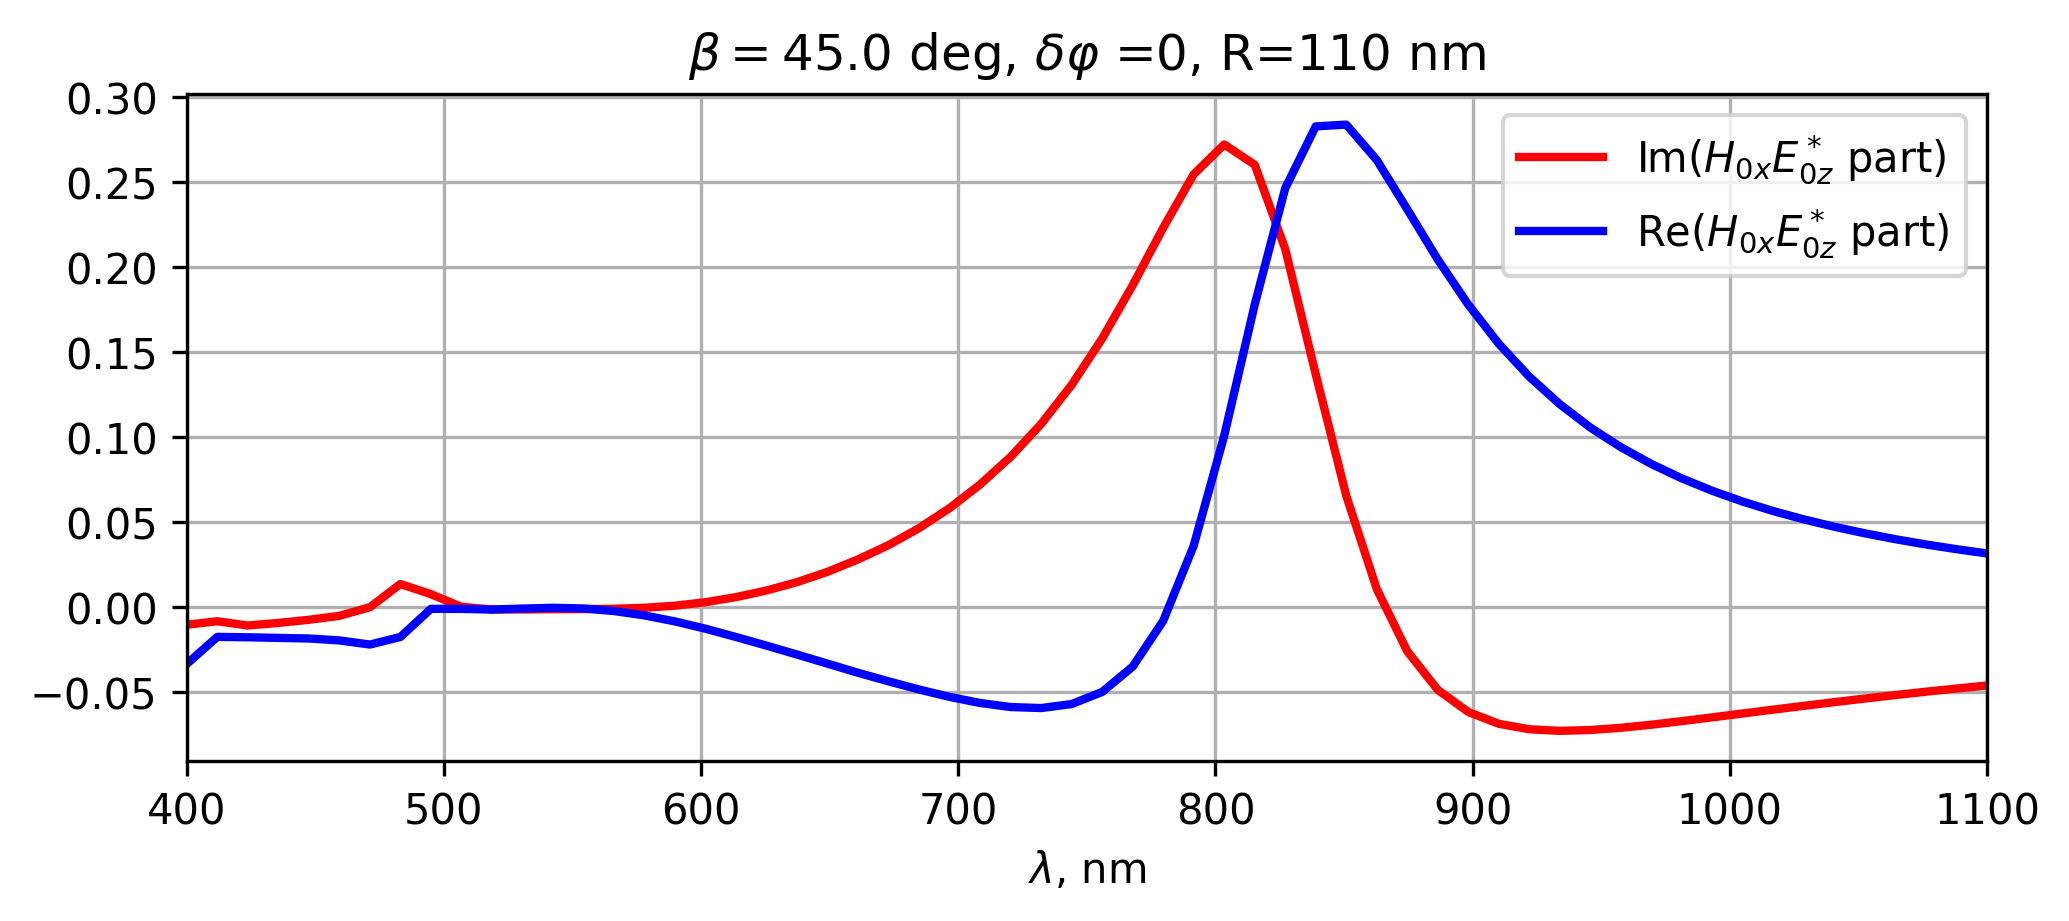

In [395]:
plt.figure(figsize=(7, 3), dpi=300)
plt.plot(wls, np.imag(py_pz_rprs_2), label='Im($H_{0x} E_{0z}^*$ part)', lw=2, c='r')
plt.plot(wls, np.real(py_pz_rprs_2), label='Re($H_{0x} E_{0z}^*$ part)', lw=2, c='b')
plt_set(wls)
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

#plt.savefig(f'E0yE0z_pypz_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')
# plt.figure(figsize=(7, 3))
# plt.plot(wls, np.imag(py_pz_rprs_2), label='Im(rp_rs_H0xE0z_conj)')
# plt.plot(wls, np.real(py_pz_rprs_2), label='Re(rp_rs_H0xE0z_conj)')
# plt_set(wls)

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\borod\AppData\Local\Temp\ipykernel_17148\1563341090.py:13: SyntaxWarning: invalid escape sequence '\d'
  plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')


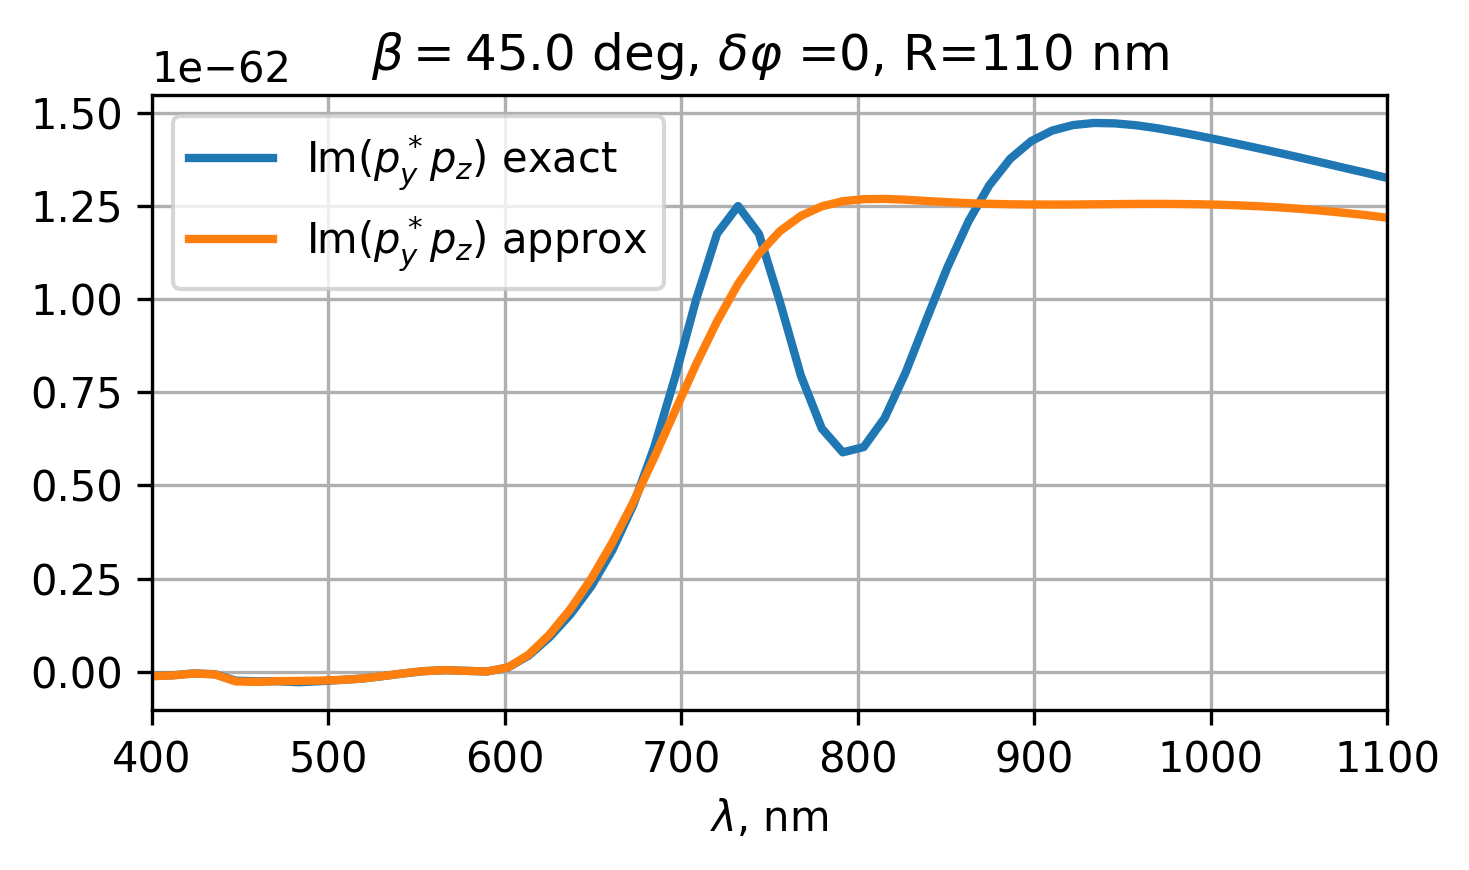

In [412]:
py_pz_coeff = -1* np.abs(AlphaEE(wls))**2 * eps0_const**2 * np.sin(2*a_angle)/2

py_pz_1 = py_pz_coeff * np.imag( Greens_py_pz *E0yE0z)

py_pz_2 = py_pz_coeff * np.imag( Greens_py_pz *py_pz_rprs_2)

py_pz_appr = py_pz_coeff *np.imag(Greens_py_pz_v2 * E0yE0z)


plt.figure(figsize=(5, 3), dpi=300)
plt.plot(wls, py_pz_1  + py_pz_2, label='Im($p_y^* p_z$) exact', lw=2)
plt.plot(wls, py_pz_appr, label='Im($p_y^* p_z$) approx', lw=2)
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
plt_set(wls)


plt.savefig(f'pypz_aprox_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')



<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\borod\AppData\Local\Temp\ipykernel_17148\972064413.py:4: SyntaxWarning: invalid escape sequence '\d'
  plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')


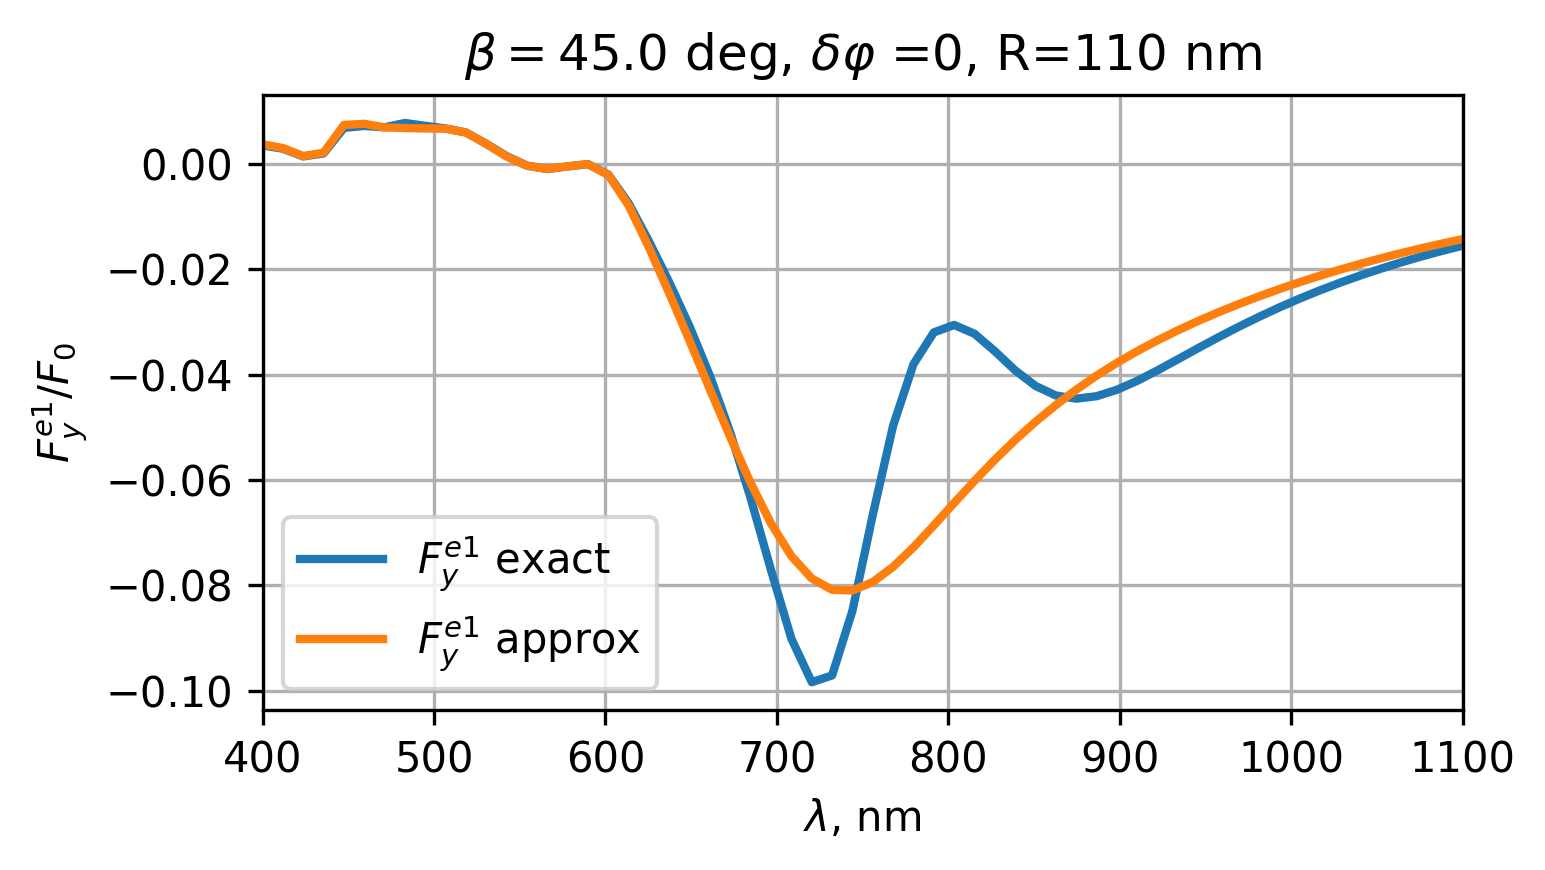

In [417]:
plt.figure(figsize=(5, 3), dpi=300)
plt.plot(wls, F_y[:,2]/F0, label=r'$F_y^{e1}$ exact', lw=2)
plt.plot(wls,  - k0(wls)**2 * py_pz_appr * np.imag(dyGE_yz) / eps0_const/F0, label=r'$F_y^{e1}$ approx', lw=2)
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
plt_set(wls)
plt.ylabel('$F_y^{e1}/F_0$')

plt.savefig(f'fye1_aprox_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')

# $Im(m_y^* m_z)$

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\l'
C:\Users\borod\AppData\Local\Temp\ipykernel_17148\3106506625.py:4: SyntaxWarning: invalid escape sequence '\d'
  plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
C:\Users\borod\AppData\Local\Temp\ipykernel_17148\3106506625.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$, nm')


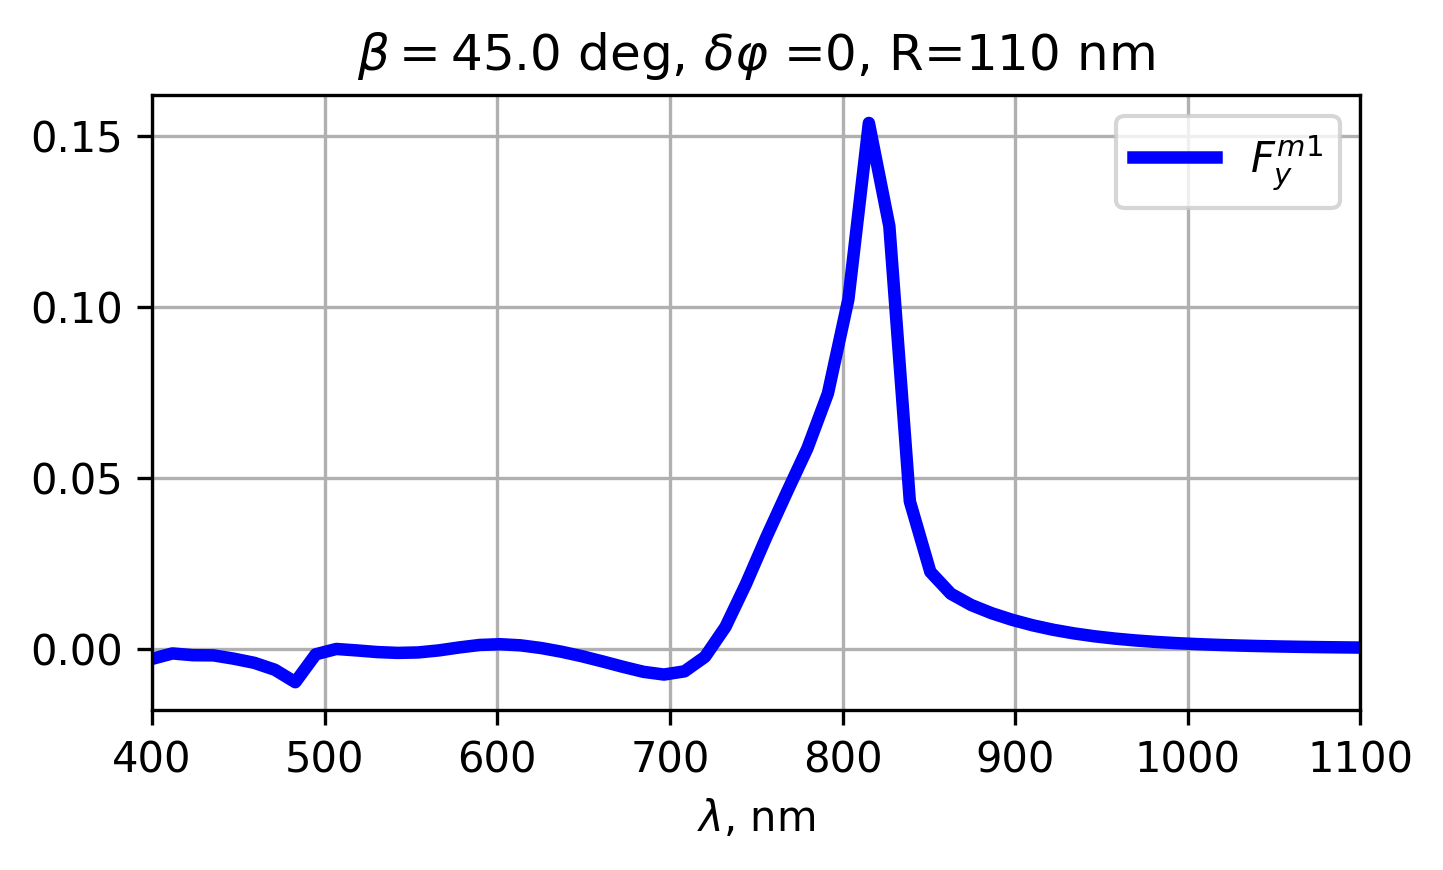

In [426]:
plt.figure(figsize=(5, 3), dpi=300)
plt.plot(wls, F_y[:,5]/F0, label='$F_y^{m1}$', lw=3, c='blue')
plt.xlim(wls[0], wls[-1])
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

plt_set(wls)
plt.xlabel('$\lambda$, nm')
plt.savefig(f'Fym1_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\borod\AppData\Local\Temp\ipykernel_17148\1255917817.py:5: SyntaxWarning: invalid escape sequence '\d'
  plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')


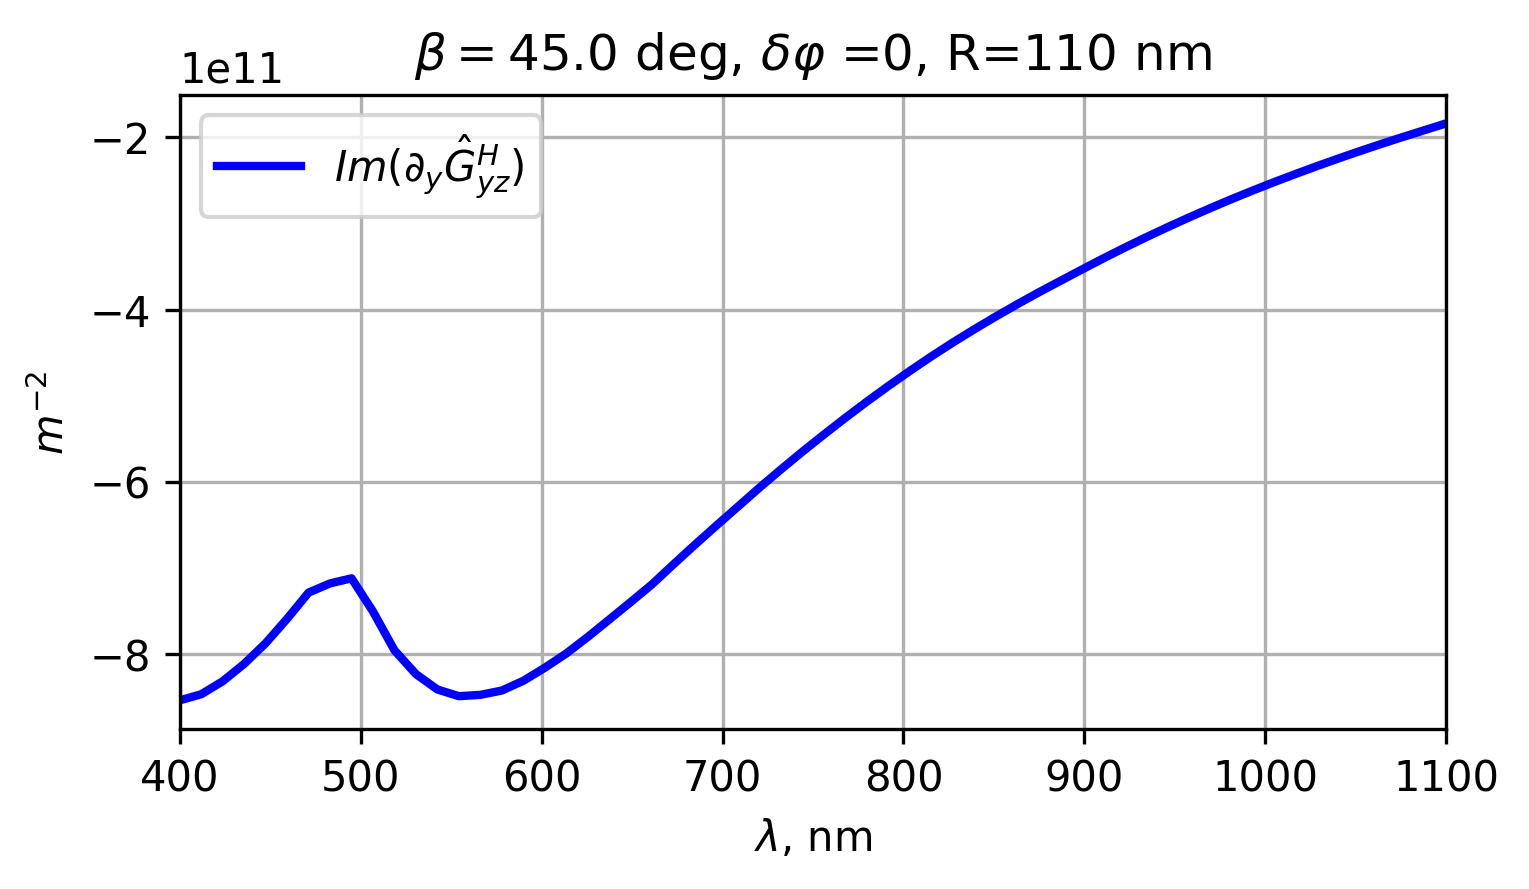

In [420]:
plt.figure(figsize=(5,3), dpi=300)
plt.plot(wls, np.imag(dyGH_yz), label=r'$Im(\partial_y \hat{G}^H_{yz})$', lw=2, c='b')
plt_set(wls)
plt.ylabel('$m^{-2}$')
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
plt.savefig(f'Im_dyGHyz_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')

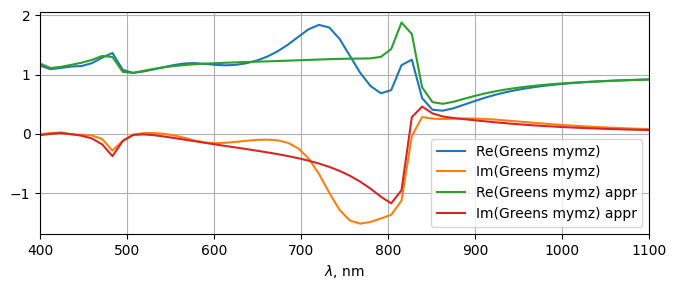

In [ ]:
Amymz = (1 - AlphaEE(wls)* eps0_const * GEExx)

Bmymz = 1 - AlphaHH(wls).conj()*GMMzz.conj()

Cmymz = (1 - AlphaHH(wls) * GMMxx)


Mmymz = - AlphaHH(wls)*AlphaEE(wls)*eps0_const * GEMxy*GMEyx


Greens_my_mz = Amymz/(Cmymz*Amymz+Mmymz)/Bmymz

Greens_my_mz_appr = Amymz/(Cmymz*Amymz+Mmymz)/Bmymz


plt.figure(figsize=(7,3))
plt.plot(wls, np.real(Greens_my_mz), label='Re(Greens mymz)')
plt.plot(wls, np.imag(Greens_my_mz), label='Im(Greens mymz)')

plt.plot(wls, np.real(Greens_my_mz_appr), label='Re(Greens mymz) appr')
plt.plot(wls, np.imag(Greens_my_mz_appr), label='Im(Greens mymz) appr')

plt_set(wls)

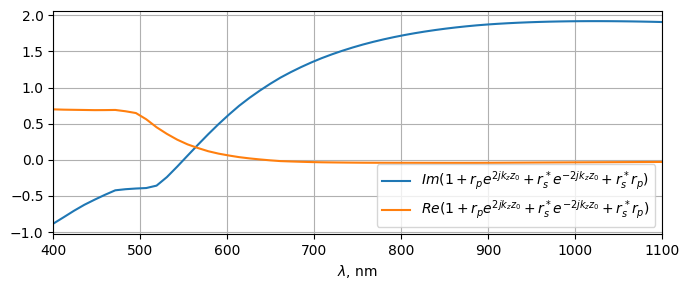

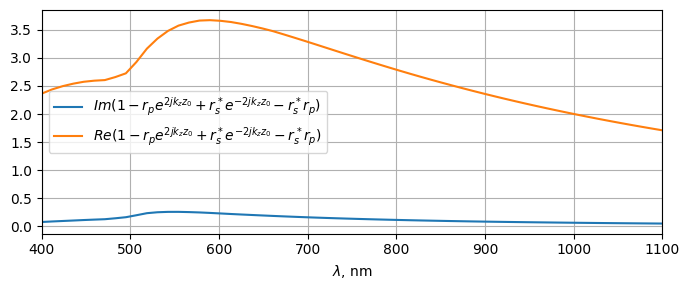

In [422]:
rp_rs_conj_mymz_2 = 1 + RSS(wls).conj() * np.exp(-2j*KZZ(wls)*z0) - RPP(wls)*np.exp(2j*KZZ(wls)*z0) - RPP(wls)*RSS(wls).conj()

rp_rs_conj_mymz_1 = 1 + RPP(wls)*np.exp(2j*KZZ(wls)*z0) + RSS(wls).conj() * np.exp(-2j*KZZ(wls)*z0) + RSS(wls).conj()*RPP(wls) 

plt.figure(figsize=(7, 3))
plt.plot(wls, np.imag(rp_rs_conj_mymz_1), label='$Im(1+r_p e^{2j k_z z_0} + r_s^* e^{-2j k_z z_0} + r_s^* r_p)$')
plt.plot(wls, np.real(rp_rs_conj_mymz_1), label='$Re(1+r_p e^{2j k_z z_0} + r_s^* e^{-2j k_z z_0} + r_s^* r_p)$')
plt_set(wls)


plt.figure(figsize=(7, 3))
plt.plot(wls, np.imag(rp_rs_conj_mymz_2), label='$Im(1 -r_p e^{2j k_z z_0} + r_s^* e^{-2j k_z z_0} - r_s^* r_p)$')
plt.plot(wls, np.real(rp_rs_conj_mymz_2), label='$Re(1 -r_p e^{2j k_z z_0} + r_s^* e^{-2j k_z z_0} - r_s^* r_p)$')
plt_set(wls)

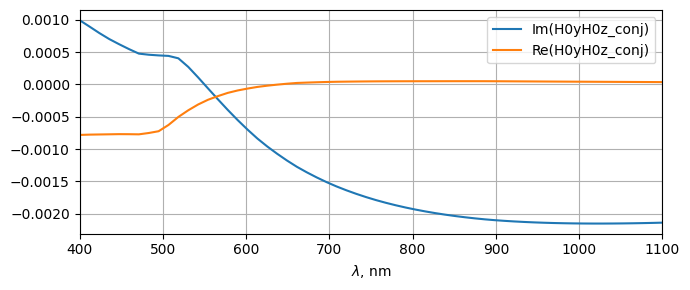

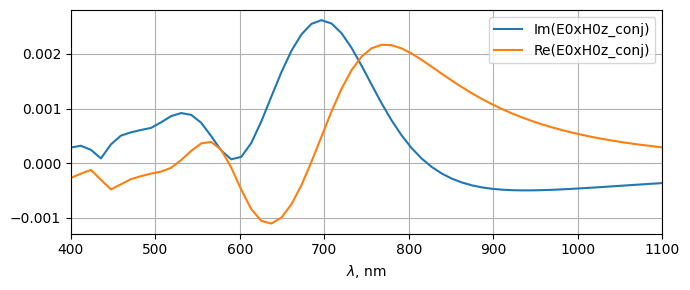

In [425]:
H0yH0z = - k0(wls) * np.sin(angle)/omega(wls)/mu0_const * rp_rs_conj_mymz_1

E0xH0z = np.sin(2*angle)/2 *AlphaEE(wls)*eps0_const * GMEyx*rp_rs_conj_mymz_2 /(1-AlphaEE(wls)*eps0_const * GEExx)

plt.figure(figsize=(7, 3))
plt.plot(wls, np.imag(H0yH0z), label='Im(H0yH0z_conj)')
plt.plot(wls, np.real(H0yH0z), label='Re(H0yH0z_conj)')
plt_set(wls)

plt.figure(figsize=(7, 3))
plt.plot(wls, np.imag(E0xH0z), label='Im(E0xH0z_conj)')
plt.plot(wls, np.real(E0xH0z), label='Re(E0xH0z_conj)')
plt_set(wls)

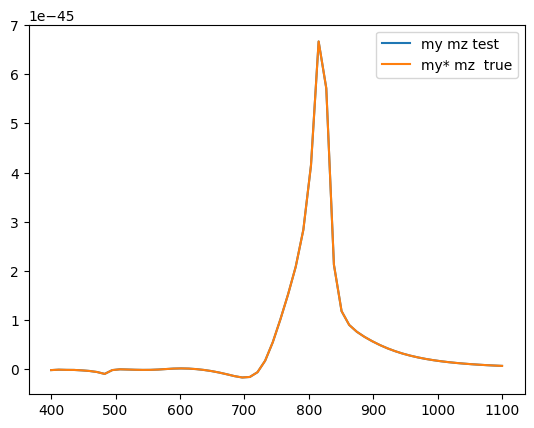

In [235]:
my_mz_coeff = -np.abs(AlphaHH(wls))**2 *  k0(wls)*np.sin(2*a_angle)/2/omega(wls)/mu0_const

my_mz_1 = my_mz_coeff * np.imag( Greens_my_mz * H0yH0z)

my_mz_2 = my_mz_coeff * np.imag( Greens_my_mz * E0xH0z)

plt.plot(wls, my_mz_1 + my_mz_2, label='my mz test')
plt.plot(wls, np.imag(M[:,1].conj()*M[:,2]), label='my* mz  true')
plt.legend()


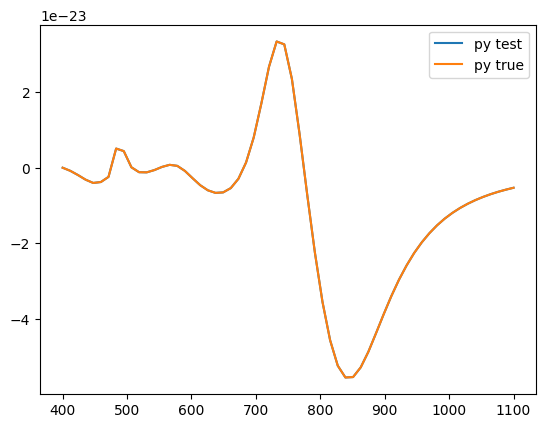

In [197]:

Greeeeens_mypz =  (1 - AlphaEE(wls)* eps0_const * GEExx) /((1 - AlphaHH(wls) * GMMxx)*(1 - AlphaEE(wls)* eps0_const * GEExx) - AlphaHH(wls)*AlphaEE(wls)*eps0_const * GEMxy*GMEyx)

H_eff_y_m = H0Y * Greeeeens_mypz

H_eff_y_e =  AlphaEE(wls) * eps0_const * GMEyx * E0X /(1-AlphaEE(wls)*eps0_const*GEExx) *  Greeeeens_mypz

H_eff_z = H0Z /(1 - AlphaHH(wls)*GMMzz)

plt.plot(wls, np.imag(AlphaHH(wls) * (H_eff_y_m + H_eff_y_e)), label='py test')
plt.plot(wls, np.real(M[:,1]), label='py true')
plt.legend()

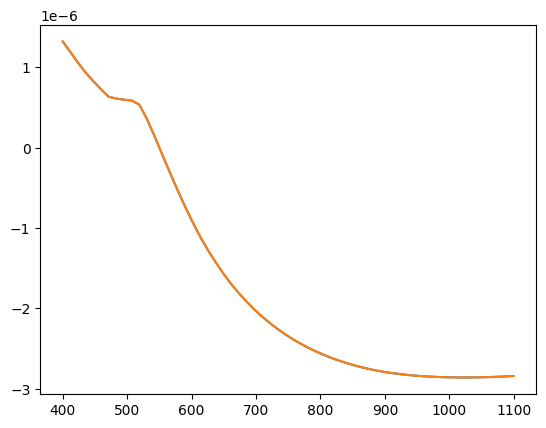

In [232]:
E0xH0z = np.sin(2*angle)/2 *AlphaEE(wls)*eps0_const * GMEyx*rp_rs_conj_mymz_2 /(1-AlphaEE(wls)*eps0_const * GEExx) #OK

my_mz_coeff_test =  k0(wls)*np.sin(2*a_angle)/2/omega(wls)/mu0_const

H0yH0zzz = - k0(wls)**2 * np.sin(angle)*np.sin(2*a_angle)/2/omega(wls)**2 / mu0_const**2 * (1 + RPP(wls)*np.exp(2j*KZZ(wls)*z0) + RSS(wls).conj() * np.exp(-2j*KZZ(wls)*z0) + RSS(wls).conj()*RPP(wls))



# plt.plot(wls, np.real( (H0Y  )* H0Z.conj()))
plt.plot(wls, np.imag( (H0Y ) * H0Z.conj()))
plt.plot(wls, np.imag(H0yH0zzz))
#plt.plot(wls, np.imag( my_mz_coeff /(-np.abs(AlphaHH(wls))**2)* (H0yH0z ) ))

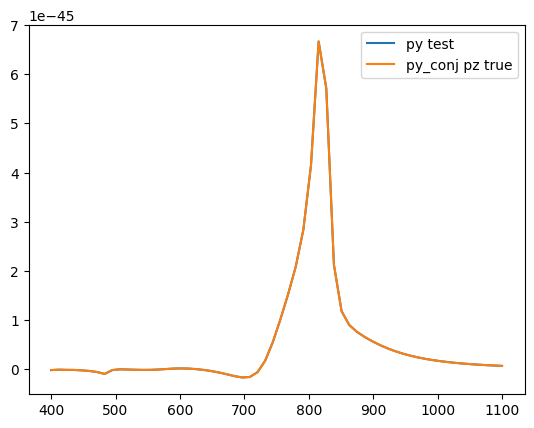

In [224]:
Amymz = (1 - AlphaEE(wls)* eps0_const * GEExx)

Bmymz = 1 - AlphaHH(wls).conj()*GMMzz.conj()

Cmymz = (1 - AlphaHH(wls) * GMMxx)

Dmymz = (1 - AlphaEE(wls)* eps0_const * GEExx)

Mmymz = - AlphaHH(wls)*AlphaEE(wls)*eps0_const * GEMxy*GMEyx


Greens_my_mz = Amymz/(Cmymz*Dmymz+Mmymz)/Bmymz

#plt.plot(wls, np.imag( Greens_my_mz * my_mz_coeff * (H0yH0z + E0xH0z) ))

plt.plot(wls, -np.abs(AlphaHH(wls))**2 * np.imag( Greens_my_mz *( (H0Y + AlphaEE(wls) * eps0_const * GMEyx *E0X/(1-AlphaEE(wls)*eps0_const*GEExx)) * H0Z.conj())), label='py test')
plt.plot(wls, np.imag(M[:,1].conj()*M[:,2]), label='py_conj pz true')
plt.legend()


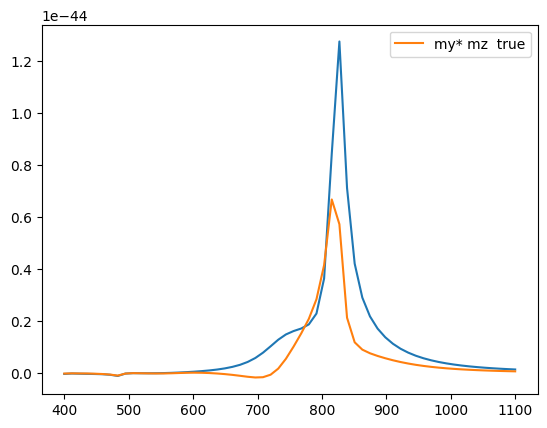

In [120]:
Amymz = 1 - AlphaEE(wls)*eps0_const*GEExx

Bmymz = 1 - AlphaHH(wls).conj()*GMMzz.conj()

Cmymz = 1 - AlphaEE(wls)*GEExx*eps0_const

Dmymz = 1 - AlphaHH(wls) * GMMxx

Mmymz = - AlphaEE(wls)*AlphaHH(wls)*eps0_const * GEMxy*GMEyx


Greens_my_mz = Amymz/(Bmymz*(Cmymz*Dmymz+Mmymz))

plt.plot(wls, -np.abs(AlphaHH(wls))**2*np.imag( (H0Y + AlphaEE(wls)*eps0_const*E0X /(1-AlphaEE(wls)*eps0_const*GEExx))*Greens_my_mz *H0Z.conj() ))
plt.plot(wls, np.imag(M[:,1].conj()*M[:,2]), label='my* mz  true')
plt.legend()

# $Re(p_x^* m_z)$

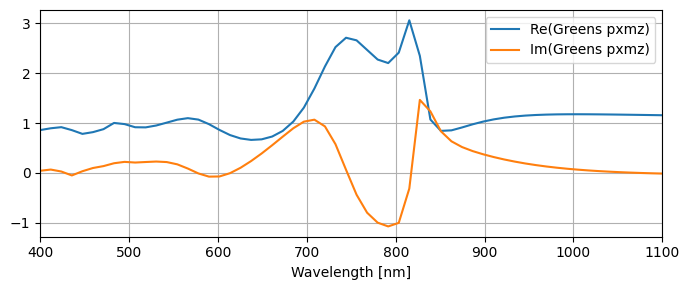

In [ ]:
Apxmy = 1 - AlphaHH(wls) * GMMxx
Bpxmz = 1 - AlphaHH(wls).conj() * GMMzz.conj()
Cpxmz = 1 - AlphaEE(wls) * eps0_const * GEExx 
Dpxmz = 1 - AlphaHH(wls)*GMMxx
Epxmz = -AlphaEE(wls)*eps0_const * AlphaHH(wls) * GEMxy * GMEyx

Greens_px_mz = Apxmy/(Bpxmz*(Cpxmz*Dpxmz+Epxmz))


plt.figure(figsize=(7,3))
plt.plot(wls, np.real(Greens_px_mz), label='Re(Greens pxmz)')
plt.plot(wls, np.imag(Greens_px_mz), label='Im(Greens pxmz)')
plt_set(wls)


In [304]:
E0X = np.cos(angle) * (np.exp(-1j*KZZ(wls)*z0) - RPP(wls)*np.exp(1j*KZZ(wls)*z0)) * np.cos(a_angle)
H0Y = -1* k0(wls) /omega(wls)/mu0_const * (np.exp(-1j*KZZ(wls)*z0)+RPP(wls)*np.exp(1j*KZZ(wls)*z0))*np.cos(a_angle)


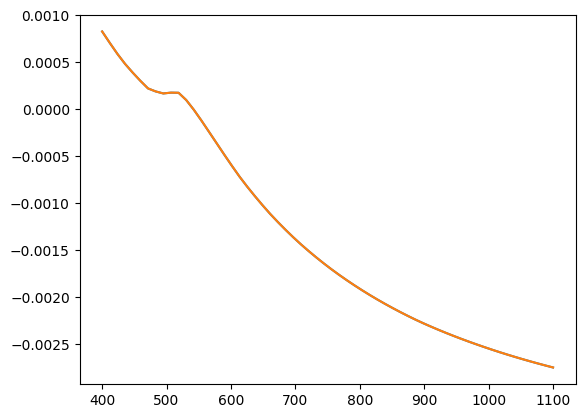

In [305]:
plt.plot(wls, np.real(H0Y))
plt.plot(wls, np.real(H00[1,0,:]))

In [282]:
H0Z = k0(wls)/omega(wls)/mu0_const * np.sin(angle) * ( np.exp(-1j*KZZ(wls)*z0) + RSS(wls)*np.exp(1j*KZZ(wls)*z0)) * np.sin(a_angle)

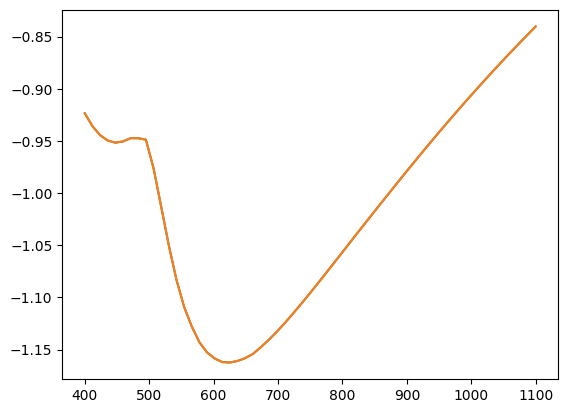

In [306]:
plt.plot(wls, np.imag(E0X))
plt.plot(wls, np.imag(E00[0,0,:]))

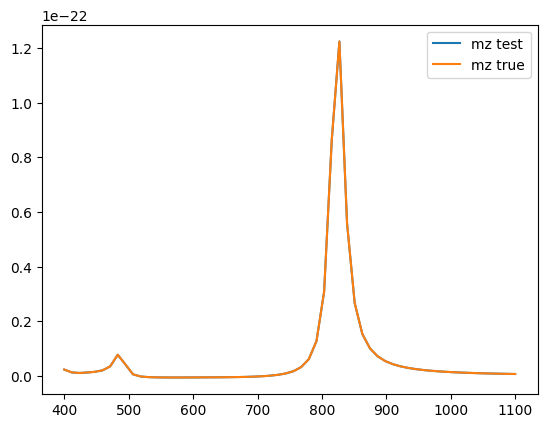

In [270]:
plt.plot(wls, np.real(AlphaHH(wls)* H0Z /(1-AlphaHH(wls)*GMMzz)), label='mz test')
plt.plot(wls, np.real(M[:,2]), label='mz true')
plt.legend()

In [294]:
def get_tens(wl, eps_Au, point, R, eps_Si, alpla, amplitude, phase, a_angle, stop):
    mu = 1
    eps = 1
    k = 2*np.pi/wl/1e-9
    omega = 2*np.pi*c_const/wl/1e-9
    x0, y0, z0 = point
    alpha_e, alpha_m = dipoles.alpha_v2(wl, R, eps_Si)
    
    G_ref_E, G_ref_H = green_func.green_ref_00(wl, z0, eps_Au, stop)
    rot_G_ref_E, rot_G_ref_H = green_func.rot_green_ref_00(wl, z0, eps_Au, stop)



    G_ee = mu*k**2/eps0_const * G_ref_E
    G_em = 1j*omega*mu*mu0_const * rot_G_ref_H
    G_me = -1j*omega*rot_G_ref_E
    G_mm = eps*mu*k**2*G_ref_H

    I = np.eye(3, dtype=np.complex128)

    A = I - eps0_const * alpha_e * G_ee - eps0_const * alpha_e * \
        G_em @ np.linalg.inv(I - alpha_m * G_mm) * alpha_m @ G_me
    B = I - alpha_m * G_mm - alpha_m * \
        G_me @ np.linalg.inv(I - eps0_const * alpha_e *
                             G_ee) * eps0_const * alpha_e @ G_em

    Am1 = np.linalg.inv(A)
    Bm1 = np.linalg.inv(B)

    alpha_ee = Am1 * alpha_e
    alpha_mm = Bm1 * alpha_m

    alpha_em = Am1 * eps0_const * \
        alpha_e @ G_em @ np.linalg.inv(I - alpha_m * G_mm) * alpha_m
    alpha_me = Bm1 * \
        alpha_m @ G_me @ np.linalg.inv(I - eps0_const *
                                       alpha_e * G_ee) * eps0_const * alpha_e

    return alpha_ee, alpha_em

In [317]:
pxx_electric = np.empty(len(wls),dtype=complex)

for i in tqdm(range(len(wls))):
    alpha_e, alpha_em = get_tens(wls[i], eps_Au, point, R, eps_Si, angle, 1, phase, a_angle, STOP) 
    pxx_electric[i] =  alpha_em[0,1] * H0Y[i]

100%|██████████| 60/60 [00:00<00:00, 4253.50it/s]


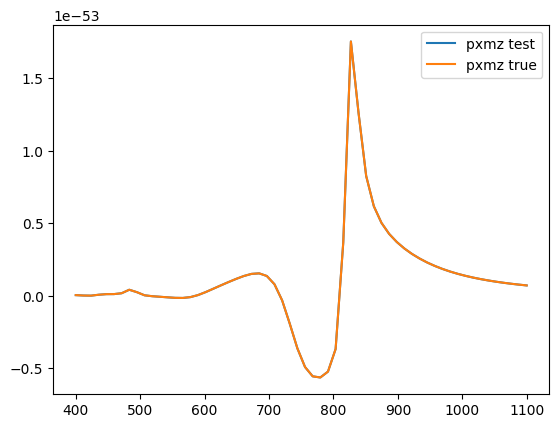

In [ ]:
Apxmy = 1 - AlphaHH(wls) * GMMxx
Bpxmz = 1 - AlphaHH(wls).conj() * GMMzz.conj()
Cpxmz = 1 - AlphaEE(wls) * eps0_const * GEExx 
Epxmz = -AlphaEE(wls)*eps0_const * AlphaHH(wls) * GMExy * GEMyx


Eeff_x_e = E0X * Apxmy / (Cpxmz*Apxmy+Epxmz)
Eeff_x_m = -H0Y * AlphaHH(wls) * GEMyx /(1-AlphaHH(wls)*GMMxx) * Apxmy / (Cpxmz*Dpxmz+Epxmz)


E0xH0z_v2 = AlphaEE(wls)*eps0_const * AlphaHH(wls).conj() * np.sin(2*angle)/ 2 * rp_rs_conj_mymz_2 

H0yH0z_v2 = -np.abs(AlphaHH(wls))**2 * AlphaEE(wls) * eps0_const *k0(wls)*np.sin(angle) * GEMxy/(omega(wls) * mu0_const * (1 - AlphaHH(wls)*GMMxx)) * rp_rs_conj_mymz_1

pxmz_coeff = k0(wls) * np.sin(2*a_angle)/2/omega(wls)/mu0_const

px_mz_1 = pxmz_coeff * np.real( Greens_px_mz * E0xH0z_v2)

px_mz_2 = pxmz_coeff * np.real( Greens_px_mz * H0yH0z_v2)

plt.plot(wls, px_mz_1+px_mz_2, label='pxmz test')

plt.plot(wls, np.real(P[:,0].conj()*M[:,2]), label='pxmz true')

plt.legend()





# $Re(m_x^* p_z) $

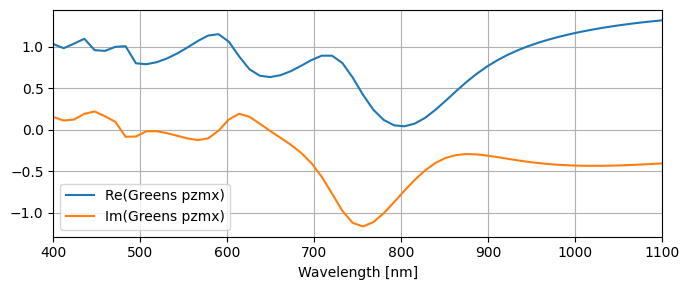

In [327]:
Apzmx = 1 - AlphaEE(wls) * eps0_const * GEExx
Bpzmx = 1 - AlphaEE(wls).conj() * eps0_const * GEEzz.conj()
Cpzmx = 1 - AlphaHH(wls) * GMMxx
Dpzmx = - AlphaHH(wls) * AlphaEE(wls) * eps0_const * GMExy * GEMyx

Greens_pz_mx = Apzmx/(Cpzmx * Apzmx + Dpzmx)/Bpzmx



plt.figure(figsize=(7,3))
plt.plot(wls, np.real(Greens_pz_mx), label='Re(Greens pzmx)')
plt.plot(wls, np.imag(Greens_pz_mx), label='Im(Greens pzmx)')
plt_set(wls)

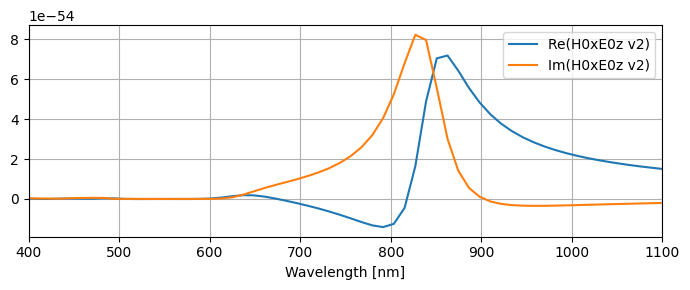

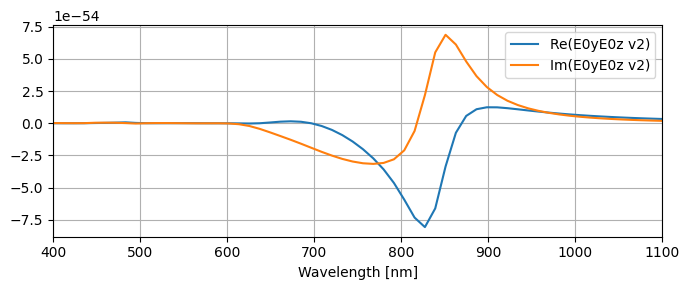

In [330]:
H0xE0z_v2 =  AlphaHH(wls) * AlphaEE(wls).conj() * H0XE0z * eps0_const

E0yE0z_v2 = E0yE0z * AlphaHH(wls) * np.abs(AlphaEE(wls))**2 *eps0_const**2 * GMExy/(1 - AlphaEE(wls) * eps0_const * GEExx)


plt.figure(figsize=(7,3))
plt.plot(wls, np.real(H0xE0z_v2), label='Re(H0xE0z v2)')
plt.plot(wls, np.imag(H0xE0z_v2), label='Im(H0xE0z v2)')
plt_set(wls)

plt.figure(figsize=(7,3))
plt.plot(wls, np.real(E0yE0z_v2), label='Re(E0yE0z v2)')
plt.plot(wls, np.imag(E0yE0z_v2), label='Im(E0yE0z v2)')
plt_set(wls)

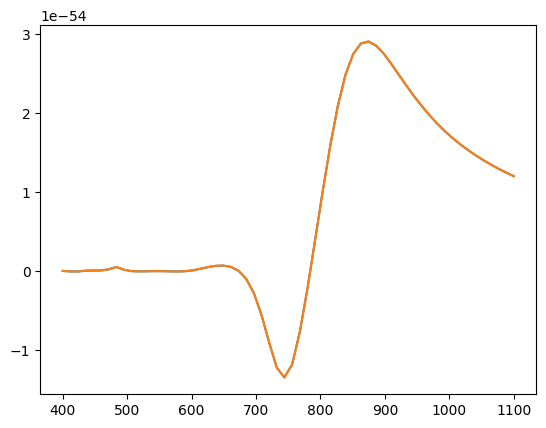

In [332]:
pz_mx_1 = np.sin(2*a_angle)/2 * np.real(Greens_pz_mx * H0xE0z_v2)

pz_mx_2 = np.sin(2*a_angle)/2 * np.real(Greens_pz_mx * E0yE0z_v2)

plt.plot(wls, pz_mx_1+pz_mx_2, label='pz mx test')
plt.plot(wls, np.real(P[:,2].conj()*M[:,0]), label='pz mx true')